In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
datalisting = pd.read_csv('https://storage.googleapis.com/h3-data/listings_final.csv', sep=';')
dataprice = pd.read_csv('https://storage.googleapis.com/h3-data/price_availability.csv', sep=';')

In [4]:
dataprice.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [5]:
datalisting.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [6]:
datalisting.drop(['Unnamed: 0'],axis='columns',inplace=True)
datalisting

,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28335197,Studio cosy Jardin du Luxembourg,entire_home,Paris,Saint Germain des Prés - Odéon,48.848695,2.325857,2,1,0,1.0,False,True,True,False,False,0.79,1.00
996,28583013,Charmant 30m2 - Faubourg Saint Martin,entire_home,Paris,République,48.871623,2.358006,3,1,1,1.0,False,True,True,False,False,1.00,1.00
997,28628316,Cosy flat in the marais - Best area,entire_home,Paris,2e arrondissement,48.867434,2.351771,4,2,1,1.0,False,True,True,True,False,1.00,1.00
998,28792796,Appartement 3 chambres madeleine.,entire_home,Paris,Madeleine - Vendôme,48.870109,2.321475,6,4,2,1.5,False,True,True,False,False,1.00,1.00


In [7]:
dataprice['local_price'].isna().sum()

0

In [8]:
duplicas=dataprice.duplicated(keep=False,subset='listing_id')
doublons=dataprice[duplicas]

In [21]:
grouped=doublons.groupby(['listing_id']).agg({'local_price':['mean']})
print(grouped)

           local_price
                  mean
listing_id            
5396        102.363985
7397        110.107632
9342        396.863014
10010       136.154856
10270       105.779221
...                ...
28836096    321.428571
28838519     54.483333
28840013    112.122530
28846494    168.037594
28851976    128.000000

[11749 rows x 1 columns]


In [22]:
grouped=grouped.reset_index()
grouped

,listing_id,local_price
,,mean
0,5396,102.363985
1,7397,110.107632
2,9342,396.863014
3,10010,136.154856
4,10270,105.779221
...,...,...
11744,28836096,321.428571
11745,28838519,54.483333
11746,28840013,112.122530


In [23]:
grouped.columns = ['listing_id','local_price']
grouped

,listing_id,local_price
0,5396,102.363985
1,7397,110.107632
2,9342,396.863014
3,10010,136.154856
4,10270,105.779221
...,...,...
11744,28836096,321.428571
11745,28838519,54.483333
11746,28840013,112.122530
11747,28846494,168.037594


In [24]:
total=pd.merge(grouped,datalisting,on=["listing_id"])
total.head()

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0


In [25]:
total.dtypes

listing_id                    int64
local_price                 float64
name                         object
type                         object
city                         object
neighborhood                 object
latitude                    float64
longitude                   float64
person_capacity               int64
beds                          int64
bedrooms                      int64
bathrooms                   float64
is_rebookable                  bool
is_new_listing                 bool
is_fully_refundable            bool
is_host_highly_rated           bool
is_business_travel_ready       bool
pricing_weekly_factor       float64
pricing_monthly_factor      float64
dtype: object

### Diagramme de répartition des données (Type Gaussiennes)

(array([304., 251., 191.,  98.,  52.,  34.,  19.,   9.,  11.,   7.,   1.,
          5.,   3.,   7.,   1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.]),
 array([  17.86372361,   88.37280161,  158.88187961,  229.3909576 ,
         299.9000356 ,  370.4091136 ,  440.9181916 ,  511.4272696 ,
         581.9363476 ,  652.4454256 ,  722.9545036 ,  793.46358159,
         863.97265959,  934.48173759, 1004.99081559, 1075.49989359,
        1146.00897159, 1216.51804959, 1287.02712758, 1357.53620558,
        1428.04528358, 1498.55436158, 1569.06343958, 1639.57251758,
        1710.08159558, 1780.59067358]),
 <BarContainer object of 25 artists>)

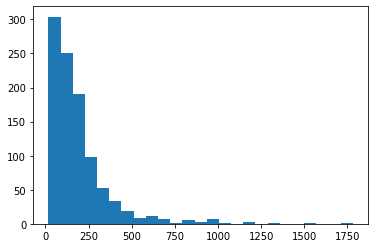

In [35]:
plt.hist(total.local_price, bins = 25)

### Boîte De Moustache

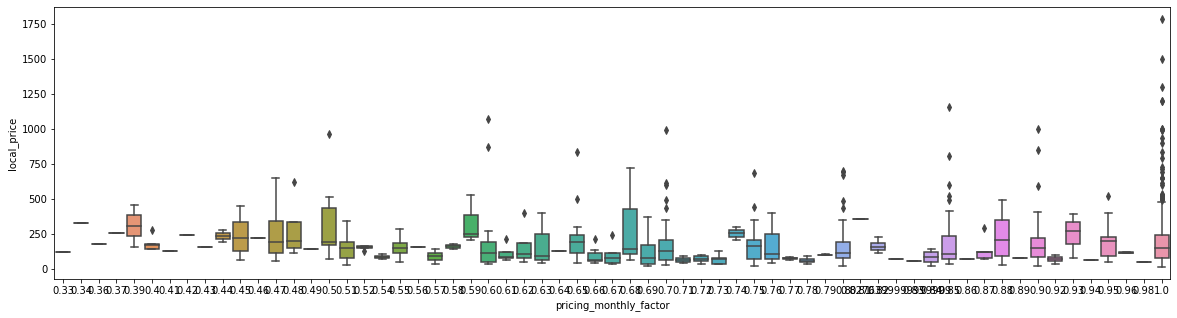

In [39]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='pricing_monthly_factor',y='local_price',data=total);

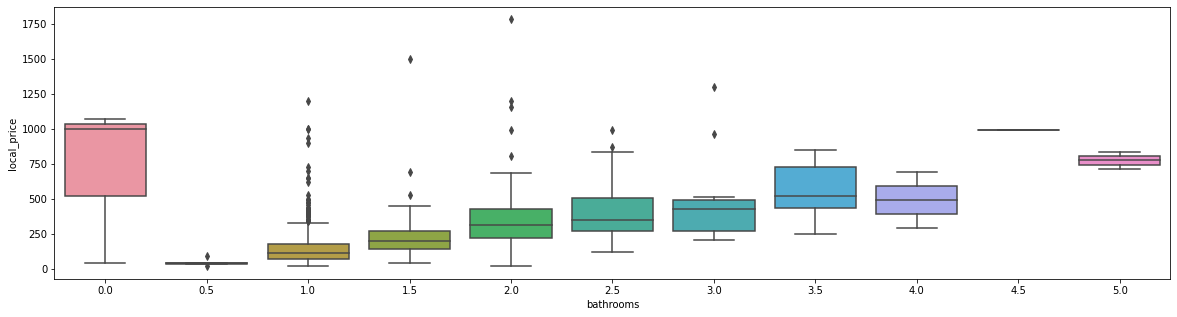

In [41]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='bathrooms',y='local_price',data=total);

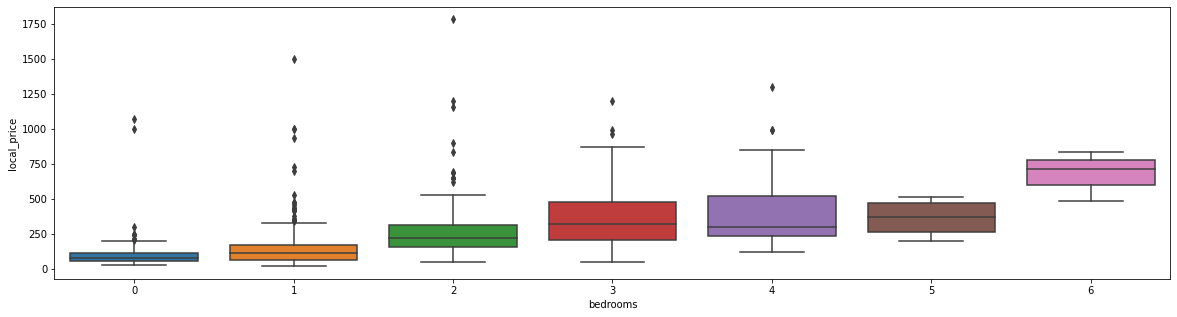

In [42]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='bedrooms',y='local_price',data=total);

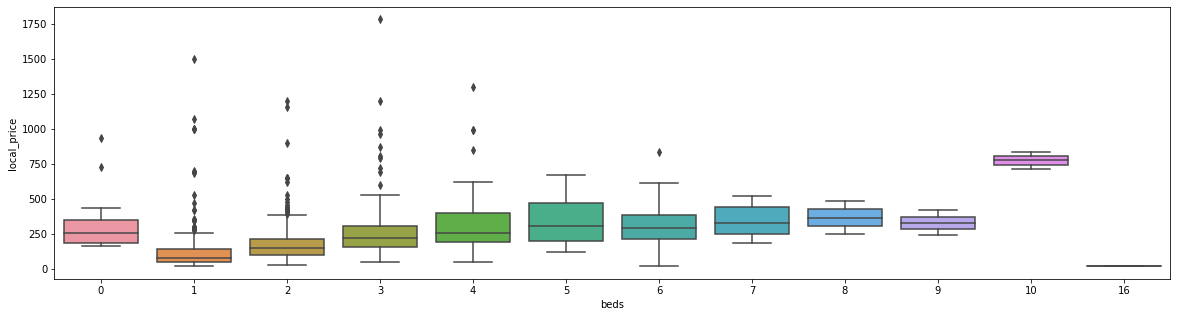

In [43]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='beds',y='local_price',data=total);

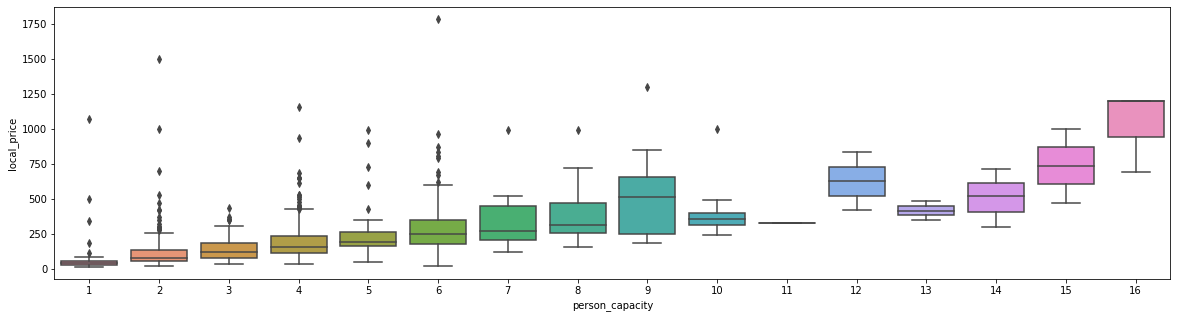

In [44]:
fig=plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='person_capacity',y='local_price',data=total);

### Heatmap

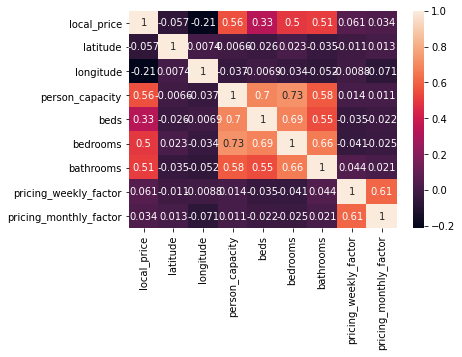

In [45]:
data_corr=pd.DataFrame(total,columns=['local_price','latitude','longitude','person_capacity','beds','bedrooms','bathrooms','pricing_weekly_factor','pricing_monthly_factor'])

sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [27]:
X=total[['person_capacity','beds','bedrooms','bathrooms']]
y=total['local_price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
regr= LinearRegression()
model=regr.fit(X_train,y_train)
model.coef_ , model.intercept_

(array([ 36.20879253, -26.20790472,  27.52192177,  95.59654916]),
 -46.69756447441793)

In [33]:
regr.score(X_test,y_test)

0.41298243967788906